(1000, 667) None L


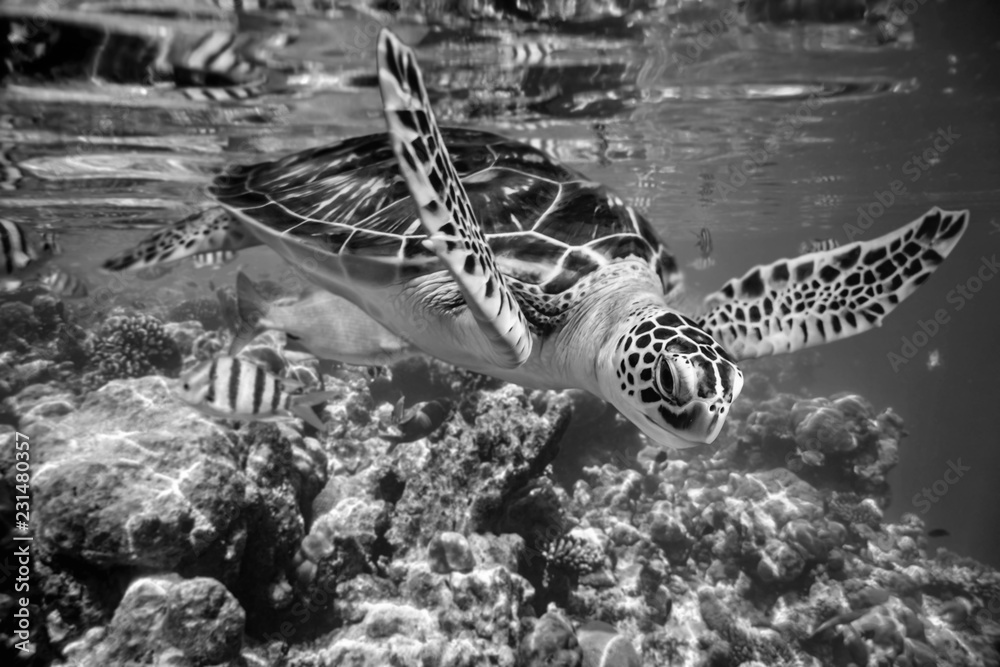

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import urllib.request
from PIL import Image
image_url = 'https://as2.ftcdn.net/v2/jpg/02/31/48/03/1000_F_231480357_TGpMz4r5HSFAlm43FkZ366FjFZuuoRA8.jpg'

urllib.request.urlretrieve(image_url,"image.png")
  
img = Image.open("image.png")

img_gray = img.convert('L')

print(img_gray.size, img_gray.format, img_gray.mode)

img_gray


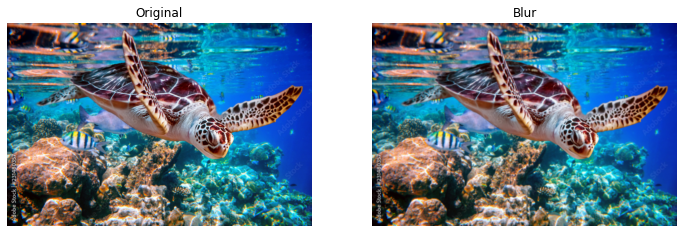

(667, 1000) (667, 1000, 3)


In [3]:
import cv2
image      = cv2.imread("image.png",cv2.IMREAD_COLOR)
image_rgb  = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel = np.asarray([[1,1,1],[1,1,1],[1,1,1]])/9

out_gray = cv2.filter2D(src=image_gray, ddepth=-1, kernel=kernel)
out_rgb  = cv2.filter2D(src=image_rgb,  ddepth=-1, kernel=kernel)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(image_rgb); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(out_rgb); plt.title('Blur'); plt.axis('off')
plt.show();
print(out_gray.shape, image.shape)

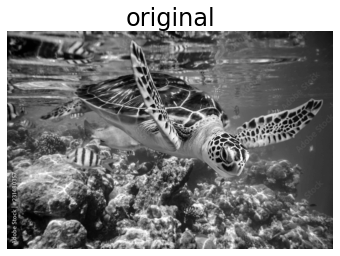

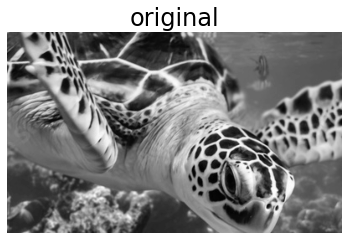

In [4]:
image      = cv2.imread("image.png",cv2.IMREAD_COLOR)
image_rgb  = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap='gray');plt.axis('off'); plt.title('original', fontsize = 24); plt.show();
plt.imshow(image_gray[2*100:2*220,2*200:2*400], cmap='gray');plt.axis('off'); plt.title('original', fontsize = 24); plt.show(); 

In [58]:
def show(image, k=4, name='Original'):
    image_ = np.asarray(image)
    plt.imshow(image_, cmap='gray');
    plt.axis('off'); 
    plt.title(name, fontsize = 24); 
    plt.show();
    
    plt.imshow(image_[k*50:k*100,k*100:k*170,:]);
    plt.axis('off'); 
    plt.title(name, fontsize = 24); 
    plt.show(); 

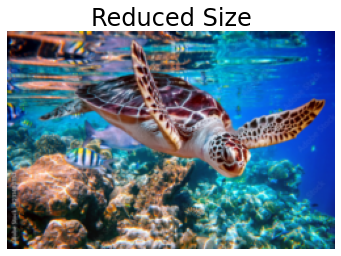

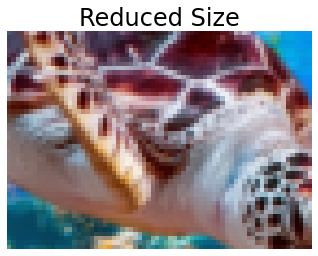

In [76]:
from PIL import Image
w,h,c = image_rgb.shape

K_Size = 4

image_small = Image.fromarray(image_rgb).resize((h//K_Size,w//K_Size),resample = Image.BILINEAR)


show(image_small,1, 'Reduced Size')

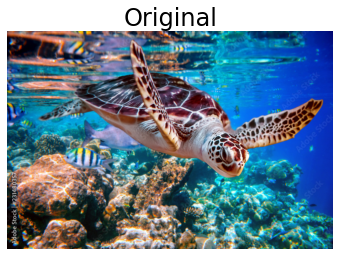

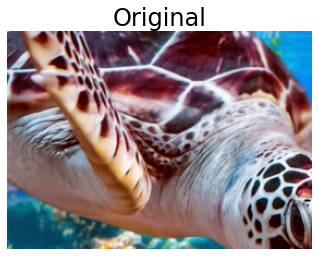

In [77]:
w,h,c = image_rgb.shape

image_ = image_small.resize((h,w),resample=Image.BILINEAR)

show(image_rgb,K_Size,'Original')

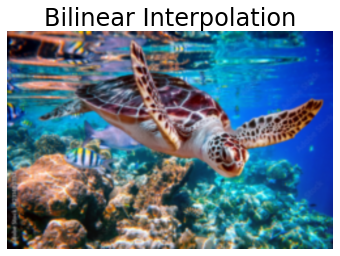

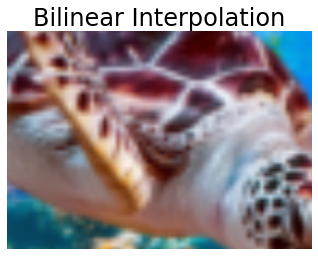

In [78]:
w,h,c = image_rgb.shape

image_ = image_small.resize((h,w),resample=Image.BILINEAR)

show(image_,K_Size,'Bilinear Interpolation')

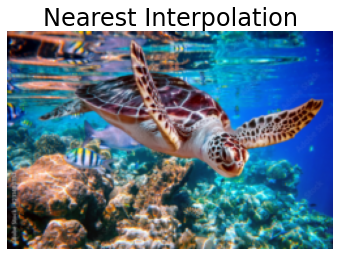

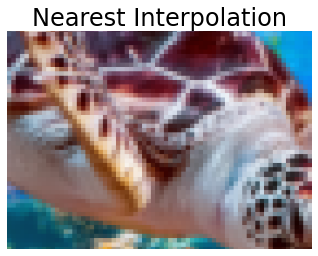

In [79]:
w,h,c = image_rgb.shape

image_ = image_small.resize((h,w),resample=Image.NEAREST)

show(image_,K_Size,'Nearest Interpolation')

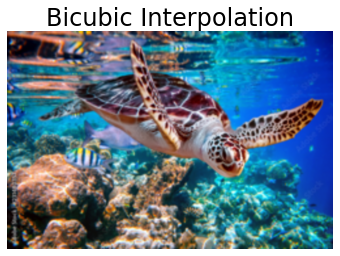

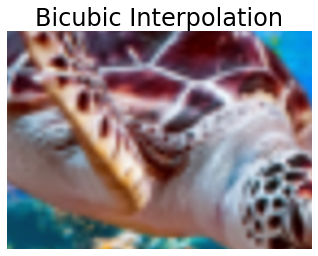

In [80]:
w,h,c = image_rgb.shape

image_ = image_small.resize((h,w),resample=Image.BICUBIC)

show(image_,K_Size,'Bicubic Interpolation')

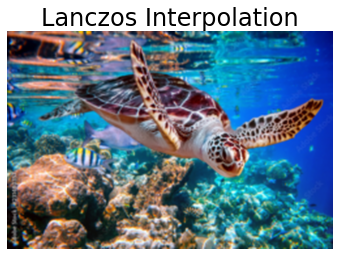

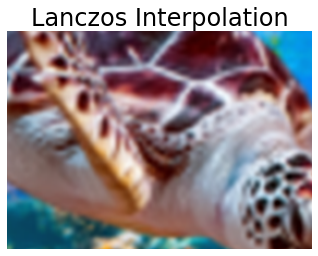

In [81]:
w,h,c = image_rgb.shape

image_ = image_small.resize((h,w),resample=Image.LANCZOS)

show(image_,K_Size,'Lanczos Interpolation')

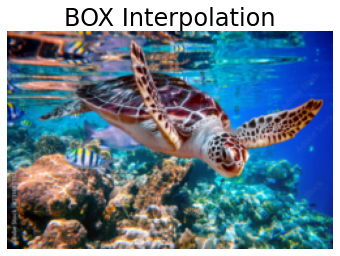

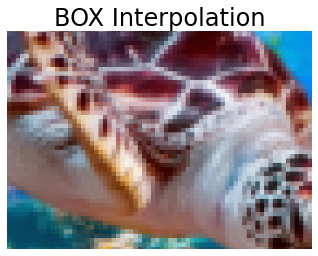

In [82]:
w,h,c = image_rgb.shape

image_ = image_small.resize((h,w),resample=Image.BOX)

show(image_,K_Size,'BOX Interpolation')

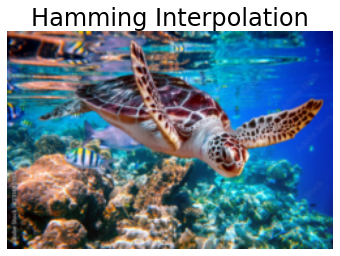

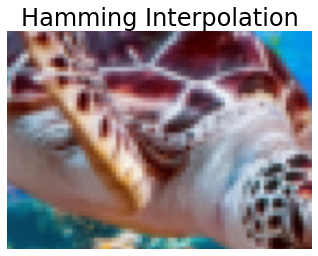

In [83]:
w,h,c = image_rgb.shape

image_ = image_small.resize((h,w),resample=Image.HAMMING)

show(image_,K_Size,'Hamming Interpolation')

In [4]:
import itertools

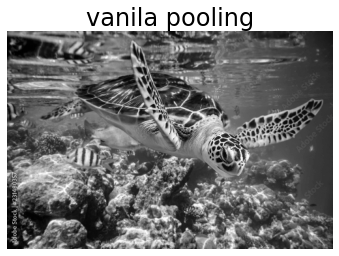

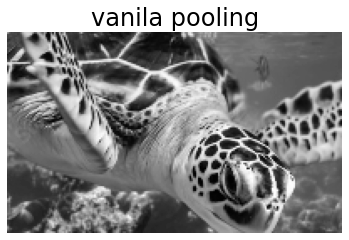

In [5]:
image_mp = image_gray[::2,::2]
plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('vanila pooling', fontsize = 24); plt.show();
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('vanila pooling', fontsize = 24); plt.show(); 

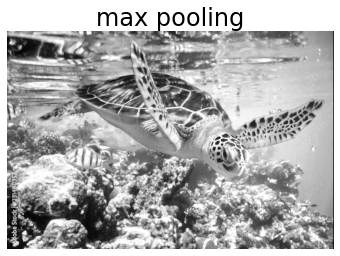

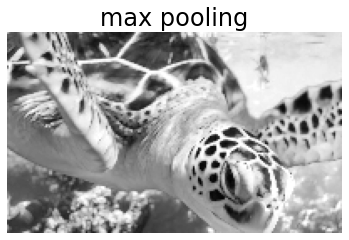

In [6]:
def maxpooling_channel(image,step=2, kernel = 2):
    w,h = image.shape[:2]
    new_image = np.zeros(((w-kernel)//step+1,(h-kernel)//step+1))

    for x,y in itertools.product(range(0,w-kernel,step),range(0,h-kernel,step)):
        image_part = image[x:x+kernel,y:y+kernel]

        new_image[x//step,y//step]  = np.max(image_part)
    return new_image.astype(int)    
        
image_mp = maxpooling_channel(image,step=2, kernel = 2)    

plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('max pooling', fontsize = 24); plt.show();
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('max pooling', fontsize = 24); plt.show(); 

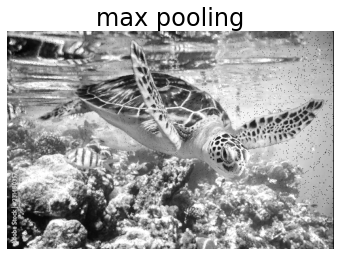

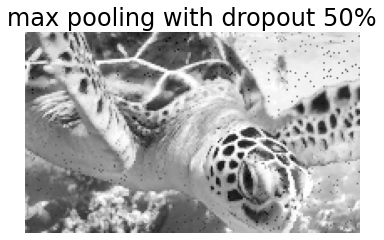

In [18]:
def maxpooling_dropout_channel(image,step=2, kernel = 2, drop_rate = 0.5):
    w,h = image.shape[:2]
    new_image = np.zeros(((w-kernel)//step+1,(h-kernel)//step+1))

    for x,y in itertools.product(range(0,w-kernel,step),range(0,h-kernel,step)):
        image_part = image[x:x+kernel,y:y+kernel].reshape(-1)
        new_image[x//step,y//step]  = np.max( np.random.choice(image_part, size = int(drop_rate*image_part.size), replace = False) )
    return new_image.astype(int)    
        
image_mp = maxpooling_dropout_channel(image,step=2, kernel = 2)    

plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('max pooling', fontsize = 24); plt.show();
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('max pooling with dropout 50%', fontsize = 24); plt.show(); 

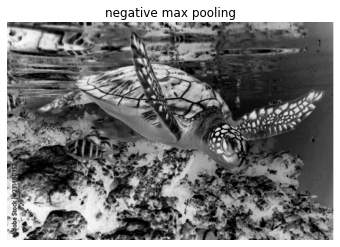

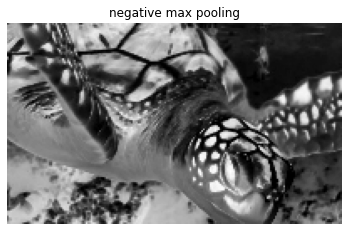

In [8]:
image_mp = 255 - maxpooling_channel(image,step=2, kernel = 2)    

plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('negative max pooling', fontsize = 24); plt.show();
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('negative max pooling', fontsize = 24); plt.show(); 

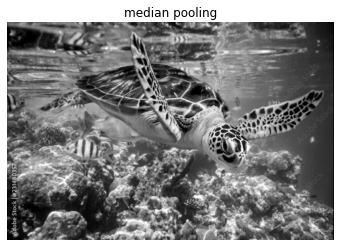

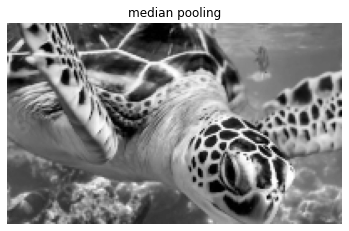

In [9]:
def medianpooling_channel(image,step=2, kernel = 2):
    w,h = image.shape[:2]
    new_image = np.zeros(((w-kernel)//step+1,(h-kernel)//step+1))

    for x,y in itertools.product(range(0,w-kernel,step),range(0,h-kernel,step)):
        image_part = image[x:x+kernel,y:y+kernel]

        new_image[x//step,y//step]  = np.median(image_part)
    return new_image.astype(int)    
        
image_mp = medianpooling_channel(image,step=2, kernel = 2)    

plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('median pooling', fontsize = 24); plt.show();
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('median pooling', fontsize = 24); plt.show(); 

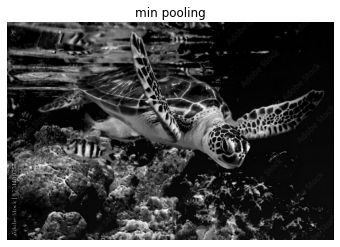

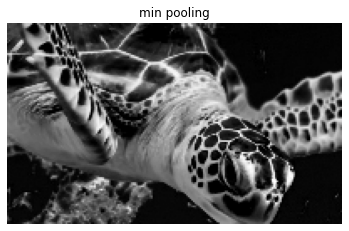

In [10]:
def minpooling_channel(image,step=2, kernel = 2):
    w,h = image.shape[:2]
    new_image = np.zeros(((w-kernel)//step+1,(h-kernel)//step+1))

    for x,y in itertools.product(range(0,w-kernel,step),range(0,h-kernel,step)):
        image_part = image[x:x+kernel,y:y+kernel]

        new_image[x//step,y//step]  = np.min(image_part)
    return new_image.astype(int)    
        
image_mp = minpooling_channel(image,step=2, kernel = 2)    

plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('min pooling', fontsize = 24); plt.show();    
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('min pooling', fontsize = 24); plt.show(); 

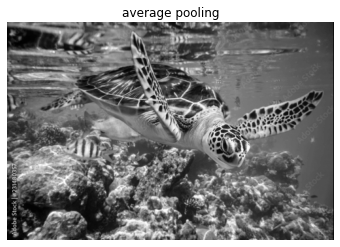

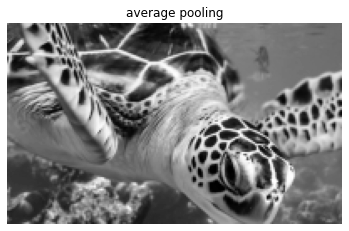

In [11]:
def averagepooling_channel(image,step=2, kernel = 2):
    w,h = image.shape[:2]
    new_image = np.zeros(((w-kernel)//step+1,(h-kernel)//step+1))

    for x,y in itertools.product(range(0,w-kernel,step),range(0,h-kernel,step)):
        image_part = image[x:x+kernel,y:y+kernel]

        new_image[x//step,y//step]  = np.mean(image_part)
    return new_image.astype(int)    
        
image_mp = averagepooling_channel(image,step=2, kernel = 2)    

plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('average pooling', fontsize = 24); plt.show();    
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('average pooling', fontsize = 24); plt.show(); 

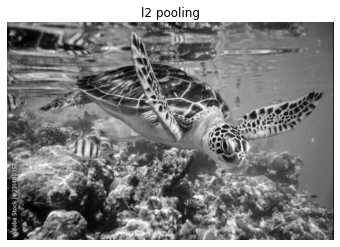

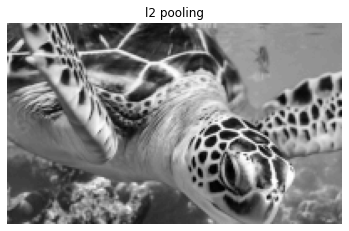

In [12]:
def l2pooling_channel(image,step=2, kernel = 2):
    w,h = image.shape[:2]
    new_image = np.zeros(((w-kernel)//step+1,(h-kernel)//step+1))

    for x,y in itertools.product(range(0,w-kernel,step),range(0,h-kernel,step)):
        image_part = image[x:x+kernel,y:y+kernel].reshape(-1).astype(float)

        new_image[x//step,y//step]  = np.sqrt(np.sum(image_part**2))/image_part.size
    return new_image.astype(int)    
        
image_mp = l2pooling_channel(image,step=2, kernel = 2)    

plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('l2 pooling', fontsize = 24); plt.show();    
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('l2 pooling', fontsize = 24); plt.show(); 

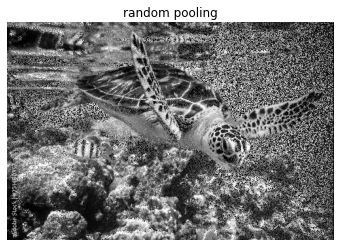

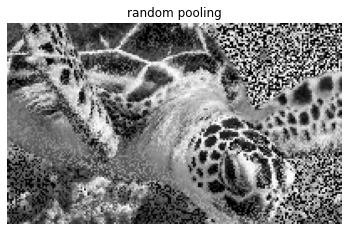

In [13]:
def random_pooling_channel(image,step=2, kernel = 2):
    w,h = image.shape[:2]
    new_image = np.zeros(((w-kernel)//step+1,(h-kernel)//step+1))

    for x,y in itertools.product(range(0,w-kernel,step),range(0,h-kernel,step)):
        image_part = image[x:x+kernel,y:y+kernel].reshape(-1)

        new_image[x//step,y//step]  = np.random.choice(image_part)
    return new_image.astype(int)    
        
image_mp = random_pooling_channel(image,step=2, kernel = 2)    

plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('random pooling', fontsize = 24); plt.show();    
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('random pooling', fontsize = 24); plt.show();    


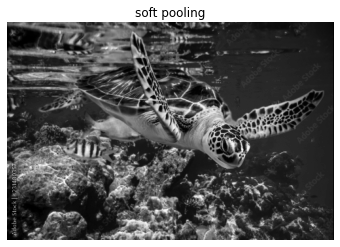

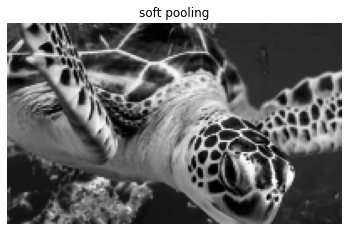

In [14]:
def softpooling_channel(image,step=2, kernel = 2):
    w,h = image.shape[:2]
    new_image = np.zeros(((w-kernel)//step+1,(h-kernel)//step+1)).astype(float)

    for x,y in itertools.product(range(0,w-kernel,step),range(0,h-kernel,step)):
        image_part = image[x:x+kernel,y:y+kernel].reshape(-1).astype(float)
        p = (image_part-np.mean(image_part))/(np.std(image_part)+1e-7)
        p = np.exp(-1*p)
        p /= (np.sum(p)+1e-7)
#         pout =  np.argmax(image_part*p)
        new_image[x//step,y//step]  = np.sum(image_part*p)#image_part[pout]
    return new_image.astype(int)    
        
image_mp = softpooling_channel(image,step=2, kernel = 2)    

plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('soft pooling', fontsize = 24); plt.show();    
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('soft pooling', fontsize = 24); plt.show(); 

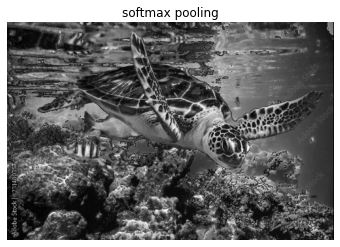

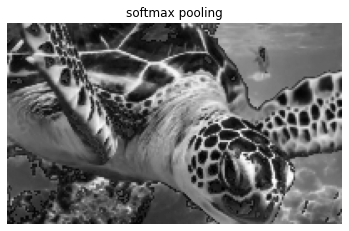

In [15]:
def softmaxpooling_channel(image,step=2, kernel = 2):
    w,h = image.shape[:2]
    new_image = np.zeros(((w-kernel)//step+1,(h-kernel)//step+1)).astype(float)

    for x,y in itertools.product(range(0,w-kernel,step),range(0,h-kernel,step)):
        image_part = image[x:x+kernel,y:y+kernel].reshape(-1).astype(float)
        p = (image_part-np.mean(image_part))/(np.std(image_part)+1e-7)
        p = np.exp(-1*p)
        p /= (np.sum(p)+1e-7)
        pout =  np.argmax(image_part*p)
        new_image[x//step,y//step]  = image_part[pout]
    return new_image.astype(int)    
        
image_mp = softmaxpooling_channel(image,step=2, kernel = 2)    

plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('softmax pooling', fontsize = 24); plt.show();
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('softmax pooling', fontsize = 24); plt.show(); 

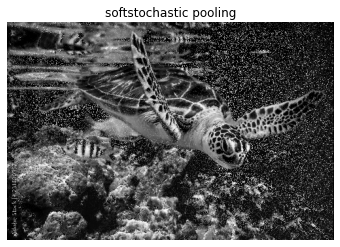

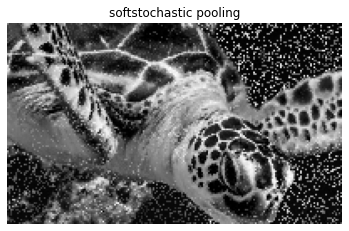

In [16]:
def softstochastic_pooling_channel(image,step=2, kernel = 2):
    w,h = image.shape[:2]
    new_image = np.zeros(((w-kernel)//step+1,(h-kernel)//step+1))

    for x,y in itertools.product(range(0,w-kernel,step),range(0,h-kernel,step)):
        image_part = image[x:x+kernel,y:y+kernel].reshape(-1)
        p = (image_part-np.mean(image_part))/(np.std(image_part)+1e-7)
        p = np.exp(-1*p)
        p /= (np.sum(p)+1e-7)

        new_image[x//step,y//step]  = np.random.choice(image_part,p=p)
    return new_image.astype(int)    
        
image_mp = softstochastic_pooling_channel(image,step=2, kernel = 2)    

plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('softstochastic pooling', fontsize = 24); plt.show();
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('softstochastic pooling', fontsize = 24); plt.show(); 

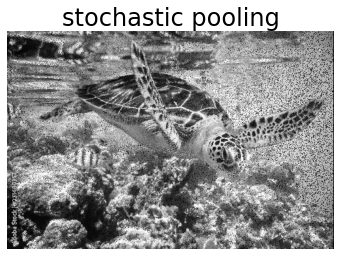

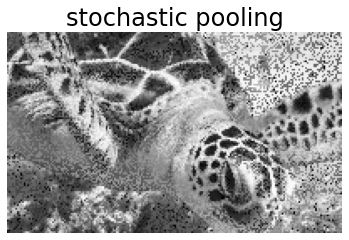

In [19]:
def stochastic_pooling_channel(image,step=2, kernel = 2):
    w,h = image.shape[:2]
    new_image = np.zeros(((w-kernel)//step+1,(h-kernel)//step+1))

    for x,y in itertools.product(range(0,w-kernel,step),range(0,h-kernel,step)):
        image_part = image[x:x+kernel,y:y+kernel].reshape(-1)
        p = image_part.astype('float')+1e-3 #(image_part-np.mean(image_part))/(np.std(image_part)+1e-7)
#         p = np.exp(-1*p)
        p /= (np.sum(p)+1e-12)
#         print(sum(p),x,y,image_part)

        new_image[x//step,y//step]  = np.random.choice(image_part,p=p)
    return new_image.astype(int)    
        
image_mp = stochastic_pooling_channel(image,step=2, kernel = 2)    

plt.imshow(image_mp, cmap='gray');plt.axis('off'); plt.title('stochastic pooling', fontsize = 24); plt.show();
plt.imshow(image_mp[100:220,200:400], cmap='gray');plt.axis('off'); plt.title('stochastic pooling', fontsize = 24); plt.show(); 